<a href="https://colab.research.google.com/github/AndrewB01/acadia_sales_analysis/blob/main/notebooks/Acadia_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('Acadia - Sr Analyst Case Study.xlsx', sheet_name=None)

In [6]:
df.keys()

dict_keys(['Summary', 'Dept Data', 'Segments', 'Profiles', 'Departments'])

In [8]:
Dept_Data = df['Dept Data']
Segments = df['Segments']
Profiles = df['Profiles']
Departments = df['Departments']

In [20]:
Dept_Data.head()

,DepartmentID,Year,SegmentID,ProfileID,Sales,Customers
0,A,2022,1,NaN,1989.77,347
1,A,2022,1,1.0,6270.30,616
2,A,2022,1,2.0,7131.06,657
3,A,2022,1,3.0,7293.91,665
4,A,2022,1,4.0,1995.79,348


In [19]:
Dept_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DepartmentID  700 non-null    object 
 1   Year          700 non-null    int64  
 2   SegmentID     700 non-null    int64  
 3   ProfileID     600 non-null    float64
 4   Sales         700 non-null    float64
 5   Customers     700 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 32.9+ KB


In [23]:
Dept_Data.isnull().sum()


,0
DepartmentID,0
Year,0
SegmentID,0
ProfileID,100
Sales,0
Customers,0


In [27]:
Dept_Data_filtered = Dept_Data[Dept_Data['ProfileID'].isnull()]
Dept_Data_filtered

,DepartmentID,Year,SegmentID,ProfileID,Sales,Customers
0,A,2022,1,NaN,1989.77,347
7,A,2022,2,NaN,12049.16,829
14,A,2022,3,NaN,2559.19,376
21,A,2022,4,NaN,2456.74,369
28,A,2022,5,NaN,12282.51,804
...,...,...,...,...,...,...
665,J,2023,1,NaN,5934.17,1670
672,J,2023,2,NaN,22293.27,3661
679,J,2023,3,NaN,4360.98,1618
686,J,2023,4,NaN,8050.79,2109


In [37]:
a = Dept_Data_filtered['Sales'].sum()
b = Dept_Data['Sales'].sum()

print ('el valor de ventas con id nulo es', a, 'el valor de ventas general es', b )
print ('el valor de ventas con id nulo representa', (a / b)*100, '% del total de ventas')


el valor de ventas con id nulo es 2250589.8 el valor de ventas general es 11859507.95
el valor de ventas con id nulo representa 18.977092552984036 % del total de ventas


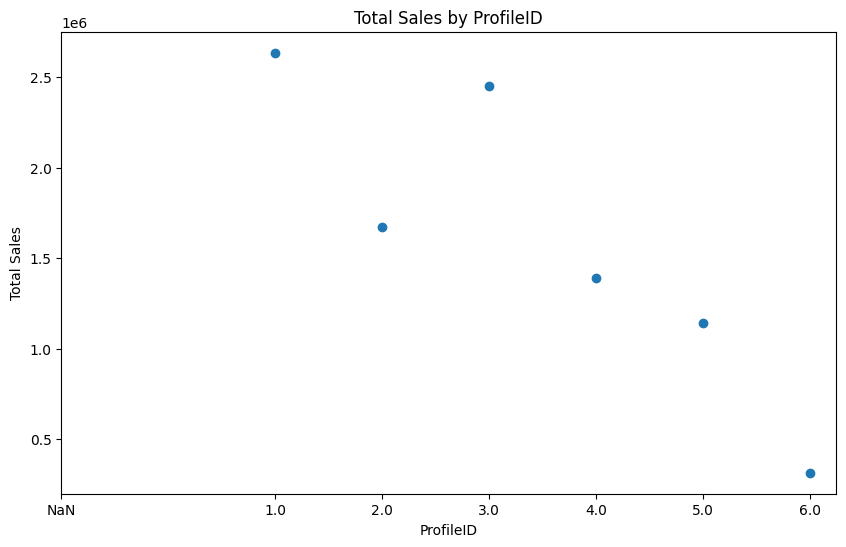

In [42]:
# Group by ProfileID and sum Sales
sales_by_profile = Dept_Data.groupby('ProfileID')['Sales'].sum()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sales_by_profile.index, sales_by_profile.values)
plt.xlabel('ProfileID')
plt.ylabel('Total Sales')
plt.title('Total Sales by ProfileID')

# Include null values in the x-axis using a separate category
# Get current x-ticks
xticks_locs = list(sales_by_profile.index)
xticks_labels = list(sales_by_profile.index)

# Append a new tick for null values, represented by -1 for example
xticks_locs.append(-1) # Use a numeric value to avoid errors
xticks_labels.append('NaN') # Display label as 'Null'

# Set the new ticks and labels
plt.xticks(xticks_locs, xticks_labels)

plt.show()


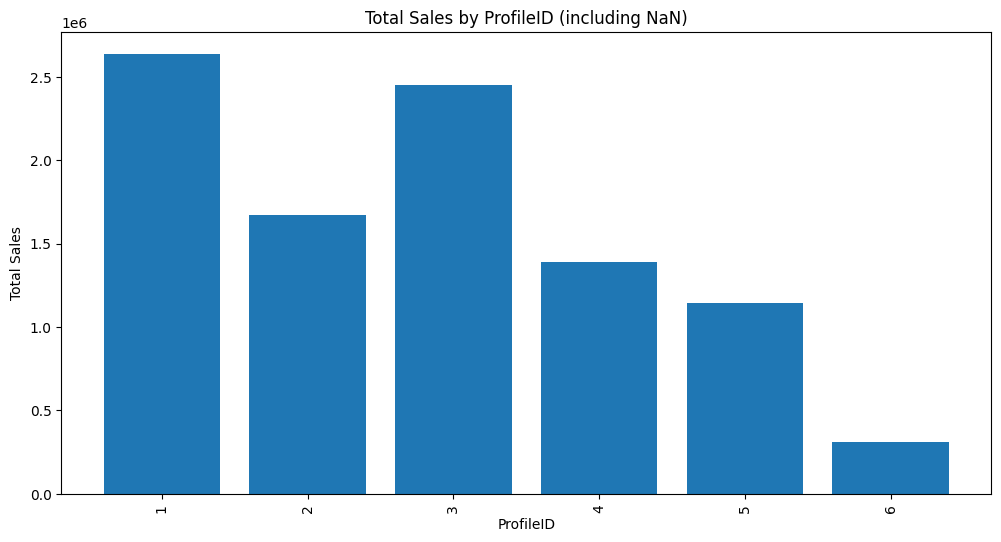

In [44]:
# prompt: bar graph with groupby of profileID including NaN distribution

# Group by ProfileID and sum Sales, including NaN values
sales_by_profile = Dept_Data.groupby('ProfileID', dropna=False)['Sales'].sum()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sales_by_profile.index, sales_by_profile.values)
plt.xlabel('ProfileID')
plt.ylabel('Total Sales')
plt.title('Total Sales by ProfileID (including NaN)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

plt.show()


In [22]:
Dept_Data.describe()

,Year,SegmentID,ProfileID,Sales,Customers
count,700.000000,700.000000,600.00000,700.000000,700.000000
mean,2022.500000,3.000000,3.50000,16942.154214,1386.940000
std,0.500358,1.415225,1.70925,44264.145444,1376.840816
min,2022.000000,1.000000,1.00000,0.000000,0.000000
25%,2022.000000,2.000000,2.00000,398.252500,337.250000
50%,2022.500000,3.000000,3.50000,3757.900000,901.000000
75%,2023.000000,4.000000,5.00000,13627.170000,2020.000000
max,2023.000000,5.000000,6.00000,437896.370000,6062.000000


In [13]:
Segments.head()

,SegmentID,Segment Description
0,1,Elite Customers
1,2,Core Customers
2,3,Power Shoppers
3,4,Infrequent Customers
4,5,New Customers


In [14]:
Profiles.head()


,ProfileID,Profile Description
0,1,City Slickers
1,2,Rich & Richer
2,3,Mr. & Mrs. Smiths
3,4,Blue Collar Royalty
4,5,Pinched Pockets


In [15]:
Departments.head()

,DepartmentID,Department Description
0,A,Shirts
1,B,Women's Jeans
2,C,Cowboy Hats
3,D,Boots
4,E,Boot Accessories
